In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
model = KMeans(n_clusters=3)
y_pred = model.fit_predict(X)
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [4]:
labels = np.zeros(y_pred.shape[0])
for i in range(3):
    mask = (y_pred == i)             # Find Which records are in cluster i
    labels[mask] = mode(y[mask])[0]  # Find the majority of real y for the filtered cluster
                                     # So we know real class

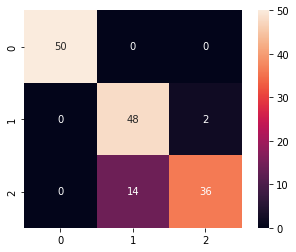

In [5]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, square=True, annot=True);

C:\Users\saber\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


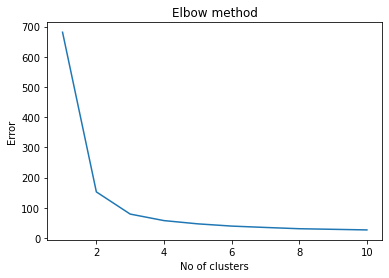

In [6]:
Error = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    Error.append(model.inertia_)
    
plt.plot(range(1,11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

# Silhouette

In [7]:
from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 17):
    model = KMeans(n_clusters=k)
    model.fit(X)
    label = model.labels_
    s = silhouette_score(X, label, metric='euclidean')
    ss.append(s)
    print("k={}, Silhouette={}".format(k, s))
print('-'*50)
print('Best K: ', np.argmax(ss)+2)

k=2, Silhouette=0.6810461692117459
k=3, Silhouette=0.5528190123564091
k=4, Silhouette=0.4980505049972866
k=5, Silhouette=0.4887488870931044
k=6, Silhouette=0.3678464984712232
k=7, Silhouette=0.35668824765816853
k=8, Silhouette=0.35974549238457515
k=9, Silhouette=0.3291355337265448
k=10, Silhouette=0.3290738005507246
k=11, Silhouette=0.3031998311655657
k=12, Silhouette=0.3023084728576272
k=13, Silhouette=0.2837051307891841
k=14, Silhouette=0.2860705381359455
k=15, Silhouette=0.2869056585461853
k=16, Silhouette=0.29262362669702147
--------------------------------------------------
Best K:  2


In [11]:
model = KMeans(n_clusters=3)
model.fit(X)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [12]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [13]:
y_pred = model.predict(X)

In [14]:
np.unique(y_pred)

array([0, 1, 2])

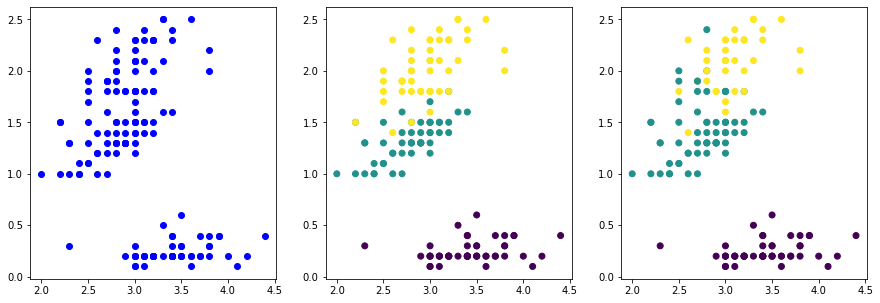

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X[:,1], X[:,3],c='b')
plt.subplot(1,3,2)
plt.scatter(X[:,1], X[:,3],c=y)
plt.subplot(1,3,3)
plt.scatter(X[:,1], X[:,3],c=y_pred);